## ISYE 6740 - Computational Data Analysis - Homework 1
## Zi Liu


In this homework, the superscript of a symbol $\text x^i$ denotes the index of samples (not raising to $i$th power); this is a convention in this class. 

### Section 1. Clustering

Given $m$ data points $\text x^i$, $i=1,\dots, m$, $K$-means clustering algorithm groups them into $k$ clusters by minimizing the distortion function over $\{ r^{ij}, \mu^j \}$
\begin{equation}
J =\sum_{i=1}^m\sum_{j=1}^k r^{ij} \|\text x^i-\mu^j\|^2,
\label{J_def}
\end{equation}
where $r^{ij}=1$ if $\text x^i$ belongs to the $j$-th cluster and $r^{ij}=0$ otherwise.


#### Problem 1.
Derive mathematically that using the squared Euclidean distance $\|\text x^i-\mu^j\|^2$ as the dissimilarity function, the centroid that minimizes the distortion function $J$  for given assignments $r^{ij}$ are given by
   $$\mu^j=\frac{\sum_i r^{ij} \text x^i}{\sum_i r^{ij}}.$$
   That is, $\mu^j$ is the center of $j$-th cluster.

#### Answer: 

$ 
\dfrac{\partial{J}}{\partial{μ^j}}  = 2 * \sum_ir^{ij} \lVert x^i - μ^j \rVert = 2 * (\sum_ir^{ij}x^i - \sum_ir^{ij}μ^j)
$

By setting $\dfrac{\partial{J}}{\partial{μ^j}} = 0 $, we get the following:

$2 * (\sum_ir^{ij}x^i - \sum_ir^{ij}μ^j) = 0$

Hence $ \sum_ir^{ij}x^i = \sum_ir^{ij}μ^j $

And $μ^j = \dfrac{\sum_i{r^{ij} x^i}}{\sum_i{r^{ij}}}$

#### Problem 2.
 Derive mathematically what should be the assignment variables $r^{ij}$ be to minimize the distortion function $J$, when the centroids $\mu^j$ are fixed.

#### Answer:
To minimize the distortion function $J$, the distance between the data point $x^i$ to the cluster $μ^j$ is equal to 0.

Based on the formula: 
$μ^j = \dfrac{\sum_i{r^{ij} x^i}}{\sum_i{r^{ij}}}$,
and $μ^j$ is equal to 0 because it is the average of all the data points $x^i$ assigned to cluster $j$,

So $r^{ij} = 1$ if $j$ = arg min$_j\lVert x^i - μ^j \rVert^2$

#### Problem 3.
 Write down a pseudocode for $K$-means algorithm here, based on your derived results. 

#### Answer:
Obtain data points $x$ and set up the maximum allowed iteration

Initialize the number of clusters

Initialize the clusters $μ$ randomly 

Loop through a number of iterations:
    
       For each data point x:
        
            Calucuate the mean μ closest to the x
            Assign the x to the mean μ by updating r ==1

       For each cluster μ:      
       
           Update μ, it is the mean of all x if r == 1

       If the number of iterations  >= maximum allowed or current cluster == old cluster:
        
           Return the current cluster
        
End        
    

#### Problem 4.
Explain why $K$-means algorithm converges to a local optimum in finite steps. 

#### Answer:
The objective function of the K-means algorithm is defined as following:
\begin{equation}
\min_{c,π}\frac{1}{m}\sum_{i=1}^m \lVert x^i - c^{π(i)} \rVert ^2
\end{equation}

The goal of the algorithm is trying to assign each data point to the clusters to ensure the distance among them are as small as possible. Sum squared error(SSE) is a common measurement for achieving this purpose.

Let's suppore there are two iterations from t to t+1. Two steps are being performed:

Step 1: the algorithm calculates the distance of each data point to the clusters and assign it to the closest one individually. By this assignment:
\begin{equation}
SSE(μ_t^j,x^i_{t+1}) <= SSE(μ_t^j,x^i_{t})
\end{equation}

Step 2: the cluster will get updated to a new mean if new data points are being reassigned during the iteration. Since a point will only get reassigned when the algorithm founds a closer cluster for it, SSE is continously decreased.

With the above two steps combined, the objetive functions gets smaller and smaller and eventually will be minimized and reaches to a local optimum.


#### Problem 5.
Calculate $k$-means by hands using Euclidean distance.  Given $5$ data points configuration in Figure 1. Assume $k = 2$.  Assuming the initialization of centroid as shown.
##### 5(a) Complete the following table for all iterations until the algorithm converges.

#### Answer:
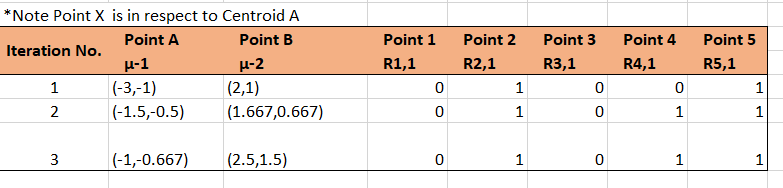



The calculation procress is shown in the following. For further details, please refter to the excel document "HW1 -problem1-5_Zi_Liu.xlsx".

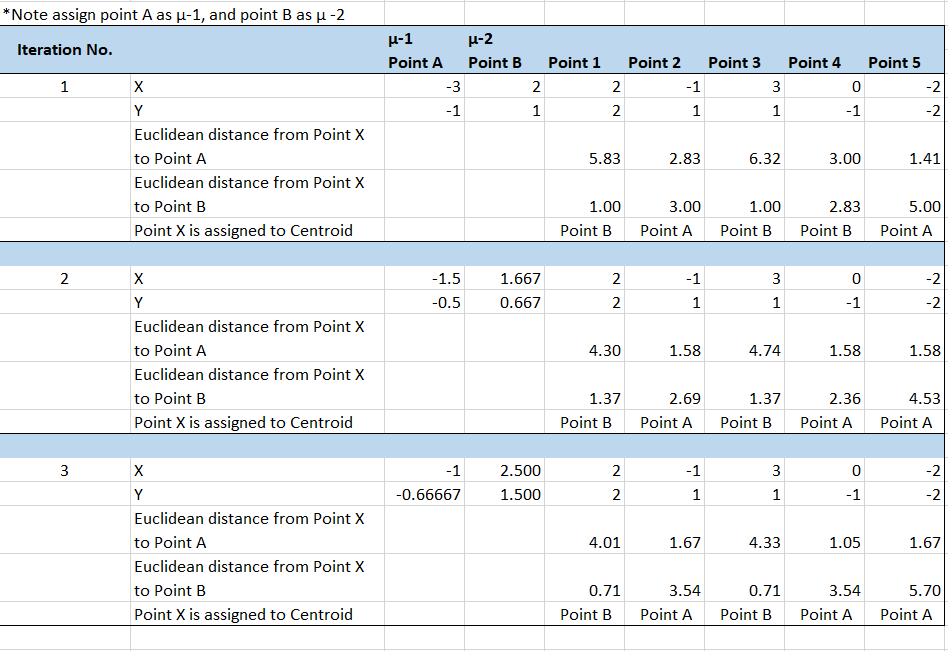

##### 5(b) How many iterations it takes for k-means to converge?
#### Answer:
It takes three iterations for the k-means to converage. As we can see from the above analysis, the assignments for all data points are no longer changed in the 3rd iterations.

### Section 2. Image compression using clustering


#### Problem 2.1 Compress pictures using k-means, run your k-means implementation with these pictures.


#### Question 2.1 Solution:

The approaches for developing the K-means algorithm are:

* First I initiate the centriods by randomly selecting them from the the image array.
* In every iteration:
    1.  I assign the data points to each cluster based on the its Euclidean distance to the closest center. At the same time, the label for each cluster is created. 
    2.  Update the center based on the mean distance of the data points giving the same label.
    3. Check if the K-means algorithm has converaged. If the centers in the prior iteration is the same as the current iteration, it is determined the the algorithm has reached to the optimum level.

The results in terms of number of iterations and the running time spent are summarized as follow:

* When the number of clusters are set to 2, in average it requires 7-8 iterations before the algorithms converaged,time spent in average 0.165 seconds.

* When the number of clusters are set to 4, in average it requires 14 iterations before the algorithms converaged, time spent in average 0.428 seconds.

* When the number of clusters are set to 8, in average it requires 40 iterations before the algorithms converaged, time spent in average 1.982 seconds.

* When the number of clusters are set to 16, in average it requires 59 iterations before the algorithms converaged, time spent in average 8.091 seconds.


The further details are shown in the output of the scripts below.  The compressed images are also presented in the later section.

My interpretation: as the number of the cluters increases, it is not surprise to see that the number of iterations and the time spent increases.The "clarity" of the images will also improve.

### Programming starts from here:

#### Import all the require packages

In [1]:
#import all required packages

import time
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow, subplots


#### The following section defines all the functions relate to image processing:

In [2]:
#Define functions for reading and displaying the images

def read_image(path):
    """
    ptype: image path
    rtype: 3D image array
    """
    img = Image.open(path)
    img_arr = np.array(img, dtype='int64')
    img.close()
    return img_arr

def show_image(img_array):
    """
    ptype: 3D image array
    """
    img_array = img_array.astype(dtype='uint8')
    img = Image.fromarray(img_array, 'RGB')

    return np.asarray(img)

#use to stack the sequence of input arrays vertically to make a single array.    
def reshape_image(img_array):
    """
    ptype: 3D image array
    rtype: 2D image array
    """
    a = np.vstack(img_array)
    
    return a

def comepress_image(algorithm,k,image_array):
    '''
    algorithm: the returning results from k_means function
    k: number of clusters
    image_array: original image before reshape
    '''
    #preparation work
    kmean_centers,kmean_labels = algorithm
    row,column,dim = image_array.shape
    centers_dict = {}
    
    for i in range(k):
        centers_dict[i] = kmean_centers[i]
        
    img_compress = np.array([centers_dict[i] for i in kmean_labels])
    img_disp = np.reshape(img_compress,(row,column,dim),order = "C")
    
    return show_image(img_disp)
    


#### The K-means algorithm is defined in the following section. It is built based on several sub-fucntions:
* init_centers()
* assign_cluster()
* update_centers()
* check_converage()


In [3]:
#k-means algorithm

#Define all the functions here.

def init_centers(data, k):
    num_samples, dim = data.shape
    centroids = np.zeros((k, dim))
    
    for i in range(k):
        index = int(np.random.uniform(0, num_samples))
        centroids[i, :] = data[index, :]
        
    return centroids

    
#Assign the cluster based on the shortest Euclidean distance 
def assign_cluster(centroids,data):
    distance = (((pow(data[:,:,None] - centroids.T[None,:,:], 2)))**0.5).sum(axis = 1) #Euclidean distance   
    labels = np.argmin(distance,axis = 1)
    
    return labels

def update_centers(data,labels):
    num_of_pts,dim = data.shape #dim == 3 for sure
    num_of_labels = len(np.unique(labels))
    
    if num_of_pts != len(labels):
        print('for self check:num_of_pts != len(labels)!')
    
    c = np.empty((num_of_labels,dim))
    
    for i in range(num_of_labels):
        pts_in_cluster = data[labels ==i,:]
        c[i,:] = np.mean(pts_in_cluster,axis = 0)
    
    return c

def check_converage(b4_center,current_centers):
    if set([tuple(x) for x in b4_center]) == set([tuple(x) for x in current_centers]):
        return True
    
    return False

def k_means(data,k,max_iteration= np.inf,seedNum=123):
    #preparation work
    np.random.seed(seedNum)
    num_samples = data.shape[0]
    
    labels = np.empty(num_samples) #create an empty array to store labels
    coveraged_flag = False
    iteration = 1
    
    #step 1: initiate centriods
    centers = init_centers(data,k)
    
    #step 2: loop
    while not coveraged_flag and iteration <= max_iteration:
        old_centers = centers
        labels = assign_cluster(centers,data)
        centers = update_centers(data,labels)
        
        if check_converage(old_centers,centers) == True:
            coveraged_flag = True
            
            print("number of iterations:",iteration)
            return centers,labels
        
        iteration += 1
        
    return centers,labels

#### First load the images:

In [4]:
#load the image and data wraggling

img_array_1 = read_image("data/football.bmp")
img_array_2 = read_image("data/beach.bmp")
img_array_3 = read_image("data/home.jpg")

# show_image(img_array_1)
# show_image(img_array_2)
# show_image(img_array_3)

img_array_1r = reshape_image(img_array_1)
img_array_2r = reshape_image(img_array_2)
img_array_3r = reshape_image(img_array_3)


#### The k is set up as  2, 4, 8, 16 repectively:

In [5]:
#Post all the initiations here.
K2 = 2
K4 = 4
K8 = 8
K16 = 16

#### The following are the K-means algorithm results for the 1st image 'football':

In [6]:
#For football image
#when K =2:

#run the k-means
start = time.time()
a2 = k_means(img_array_1r,K2,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K2,int(minutes),round(seconds,3)))

print('=================')

#when K =4:

#run the k-means
start = time.time()
a4 = k_means(img_array_1r,K4,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K4,int(minutes),round(seconds,3)))

print('=================')

#when K =8:

#run the k-means
start = time.time()
a8 = k_means(img_array_1r,K8,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K8,int(minutes),round(seconds,3)))

print('=================')

#when K =16:

#run the k-means
start = time.time()
a16 = k_means(img_array_1r,K16,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K16,int(minutes),round(seconds,3)))

print('=================')


number of iterations: 7
Time taken for k_means: k=2 is min:0 second:0.37
number of iterations: 11
Time taken for k_means: k=4 is min:0 second:0.96
number of iterations: 18
Time taken for k_means: k=8 is min:0 second:2.688
number of iterations: 68
Time taken for k_means: k=16 is min:0 second:15.71


Footall pictures after compressions


Text(0.5, 1.0, 'K=16\n')

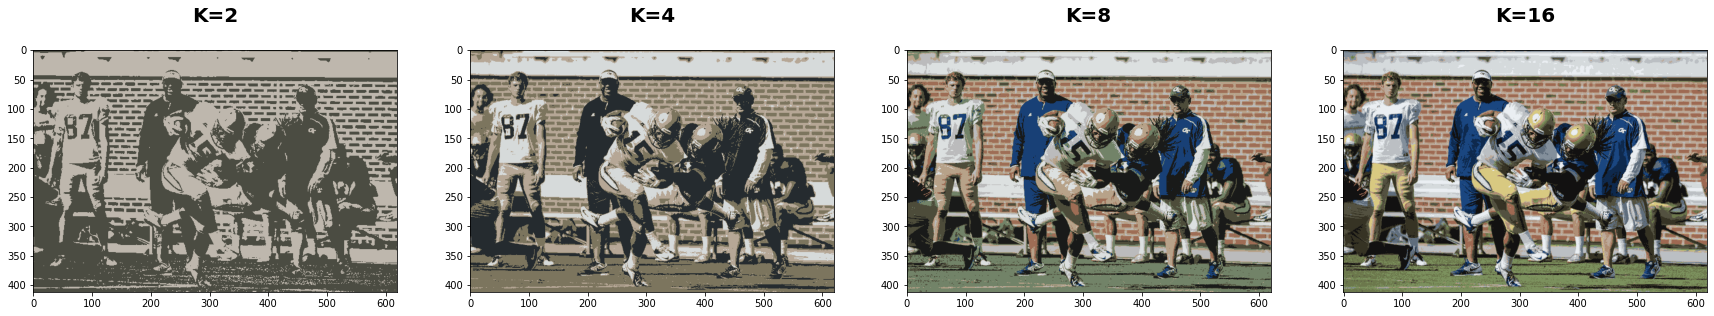

In [7]:
#compress the image
print("Footall pictures after compressions")
imgage_1_k2= comepress_image(a2,K2,img_array_1)
imgage_1_k4= comepress_image(a4,K4,img_array_1)
imgage_1_k8= comepress_image(a8,K8,img_array_1)
imgage_1_k16= comepress_image(a16,K16,img_array_1)

intro_fig, ax = subplots(1,4, figsize=(30,15))
ax[0].imshow(imgage_1_k2)
ax[0].set_title('K=2\n', fontsize=20, weight='bold')
ax[1].imshow(imgage_1_k4)
ax[1].set_title('K=4\n', fontsize=20, weight='bold')
ax[2].imshow(imgage_1_k8)
ax[2].set_title('K=8\n', fontsize=20, weight='bold')
ax[3].imshow(imgage_1_k16)
ax[3].set_title('K=16\n', fontsize=20, weight='bold')

#### The following are the K-means algorithm results for the 2nd image 'beach':

In [8]:
#Run the functions

#For beach image

#when K =2:

#run the k-means
start = time.time()
b2 = k_means(img_array_2r,K2,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K2,int(minutes),round(seconds,3)))

print('=================')

#when K =4:

#run the k-means
start = time.time()
b4 = k_means(img_array_2r,K4,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K4,int(minutes),round(seconds,3)))

print('=================')

#when K =8:

#run the k-means
start = time.time()
b8 = k_means(img_array_2r,K8,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K8,int(minutes),round(seconds,3)))

print('=================')

#when K =16:

#run the k-means
start = time.time()
b16 = k_means(img_array_2r,K16,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K16,int(minutes),round(seconds,3)))

print('=================')


number of iterations: 8
Time taken for k_means: k=2 is min:0 second:0.077
number of iterations: 19
Time taken for k_means: k=4 is min:0 second:0.298
number of iterations: 46
Time taken for k_means: k=8 is min:0 second:1.345
number of iterations: 75
Time taken for k_means: k=16 is min:0 second:4.069


Beach pictures after compressions


Text(0.5, 1.0, 'K=16\n')

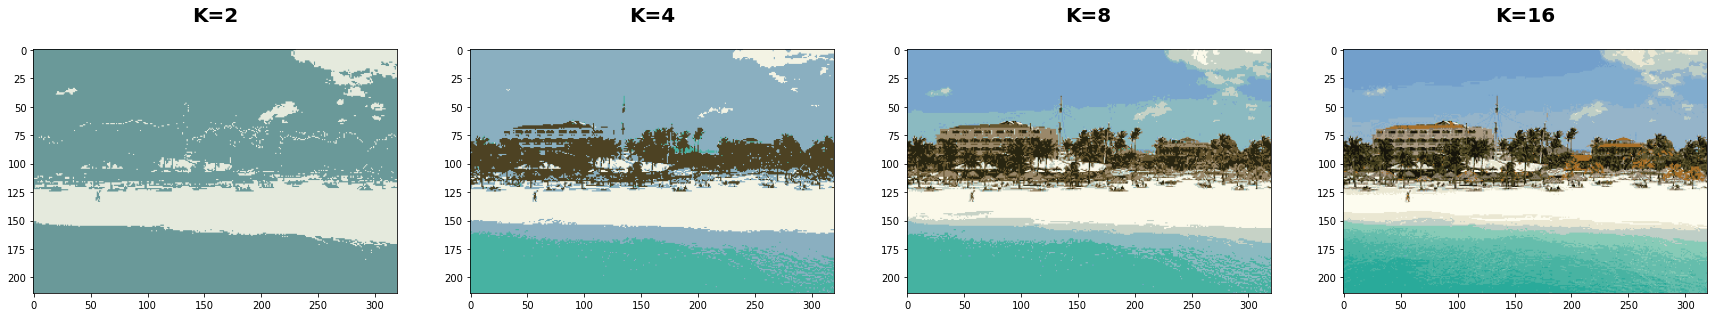

In [9]:
#compress the image
print("Beach pictures after compressions")
imgage_2_k2= comepress_image(b2,K2,img_array_2)
imgage_2_k4= comepress_image(b4,K4,img_array_2)
imgage_2_k8= comepress_image(b8,K8,img_array_2)
imgage_2_k16= comepress_image(b16,K16,img_array_2)

intro_fig, ax = subplots(1,4, figsize=(30,15))
ax[0].imshow(imgage_2_k2)
ax[0].set_title('K=2\n', fontsize=20, weight='bold')
ax[1].imshow(imgage_2_k4)
ax[1].set_title('K=4\n', fontsize=20, weight='bold')
ax[2].imshow(imgage_2_k8)
ax[2].set_title('K=8\n', fontsize=20, weight='bold')
ax[3].imshow(imgage_2_k16)
ax[3].set_title('K=16\n', fontsize=20, weight='bold')

#### The following are the K-means algorithm results for the 3rd image 'home':

In [10]:
#Run the functions

#For home image

#when K =2:

#run the k-means
start = time.time()
c2 = k_means(img_array_3r,K2,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K2,int(minutes),round(seconds,3)))

print('=================')

#when K =4:

#run the k-means
start = time.time()
c4 = k_means(img_array_3r,K4,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K4,int(minutes),round(seconds,3)))

print('=================')

#when K =8:

#run the k-means
start = time.time()
c8 = k_means(img_array_3r,K8,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K8,int(minutes),round(seconds,3)))

print('=================')

#when K =16:

#run the k-means
start = time.time()
c16 = k_means(img_array_3r,K16,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K16,int(minutes),round(seconds,3)))

print('=================')


number of iterations: 7
Time taken for k_means: k=2 is min:0 second:0.067
number of iterations: 12
Time taken for k_means: k=4 is min:0 second:0.196
number of iterations: 56
Time taken for k_means: k=8 is min:0 second:1.646
number of iterations: 33
Time taken for k_means: k=16 is min:0 second:1.817


Home pictures after compressions


Text(0.5, 1.0, 'K=16\n')

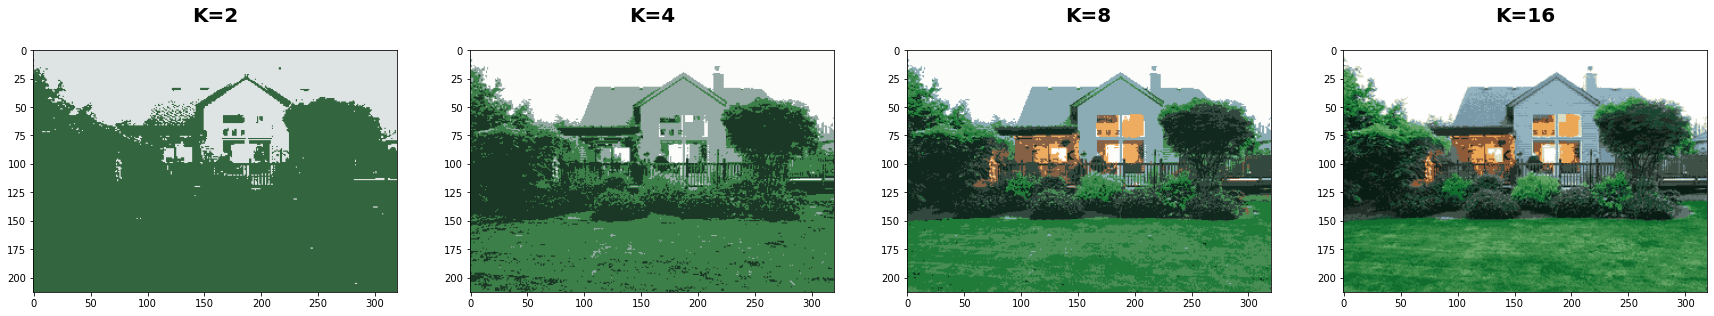

In [11]:
#compress the image
print("Home pictures after compressions")
imgage_3_k2= comepress_image(c2,K2,img_array_3)
imgage_3_k4= comepress_image(c4,K4,img_array_3)
imgage_3_k8= comepress_image(c8,K8,img_array_3)
imgage_3_k16= comepress_image(c16,K16,img_array_3)

intro_fig, ax = subplots(1,4, figsize=(30,15))
ax[0].imshow(imgage_3_k2)
ax[0].set_title('K=2\n', fontsize=20, weight='bold')
ax[1].imshow(imgage_3_k4)
ax[1].set_title('K=4\n', fontsize=20, weight='bold')
ax[2].imshow(imgage_3_k8)
ax[2].set_title('K=8\n', fontsize=20, weight='bold')
ax[3].imshow(imgage_3_k16)
ax[3].set_title('K=16\n', fontsize=20, weight='bold')

#### Problem 2.2 Run your k-means implementation with different initialization centroids. How does this it affect your final result?

#### Question 2.2 Solution:

I use the "home" image for this problem. Two extrme cases are impremented for initializing the centroids.

* Case 1: all centroids are initialize at 0.
* Case 2: all centroids are initialize at 250.

By looking at the number of iterations and the time taken for algorithm to run, there are no significant difference when the centroids are initialize at extreme number. The compressed image also shows no difference.

For further detail please see the outputs of the following scripts.

##### Case 1: all centroids are initialize at 0.

In [12]:
#Update k_means function.

def k_means_0(data,k,max_iteration= np.inf,seedNum=123):
    #preparation work
    np.random.seed(seedNum)
    num_samples = data.shape[0]
    
    labels = np.empty(num_samples) #create an empty array to store labels
    coveraged_flag = False
    iteration = 1
    
    #step 1: initiate centriods
    centers = np.array([[0,0,0], [0,0,1]])
    
    #step 2: loop
    while not coveraged_flag and iteration <= max_iteration:
        old_centers = centers
        labels = assign_cluster(centers,data)
        centers = update_centers(data,labels)
        
        if check_converage(old_centers,centers) == True:
            coveraged_flag = True
            
            print("number of iterations:",iteration)
            return centers,labels
        
        iteration += 1
        
    return centers,labels


##### Case 2: all centroids are initialize at 250.

In [13]:
def k_means_1(data,k,max_iteration= np.inf,seedNum=123):
    #preparation work
    np.random.seed(seedNum)
    num_samples = data.shape[0]
    
    labels = np.empty(num_samples) #create an empty array to store labels
    coveraged_flag = False
    iteration = 1
    
    #step 1: initiate centriods
    centers = np.array([[250,250,250], [250,250,251]])
    
    #step 2: loop
    while not coveraged_flag and iteration <= max_iteration:
        old_centers = centers
        labels = assign_cluster(centers,data)
        centers = update_centers(data,labels)
        
        if check_converage(old_centers,centers) == True:
            coveraged_flag = True
            
            print("number of iterations:",iteration)
            return centers,labels
        
        iteration += 1
        
    return centers,labels


#### Generate the statistics and the images to look for the potential impacts when the centriod initializations are set differently.

Initialize centriods all at 0:
number of iterations: 9
Time taken for k_means: k=2 is min:0 second:0.088
Initialize centriods all at 250:
number of iterations: 8
Time taken for k_means: k=2 is min:0 second:0.078
Images comparisons with different centroids initialization


Text(0.5, 1.0, 'Init center = 250s\n')

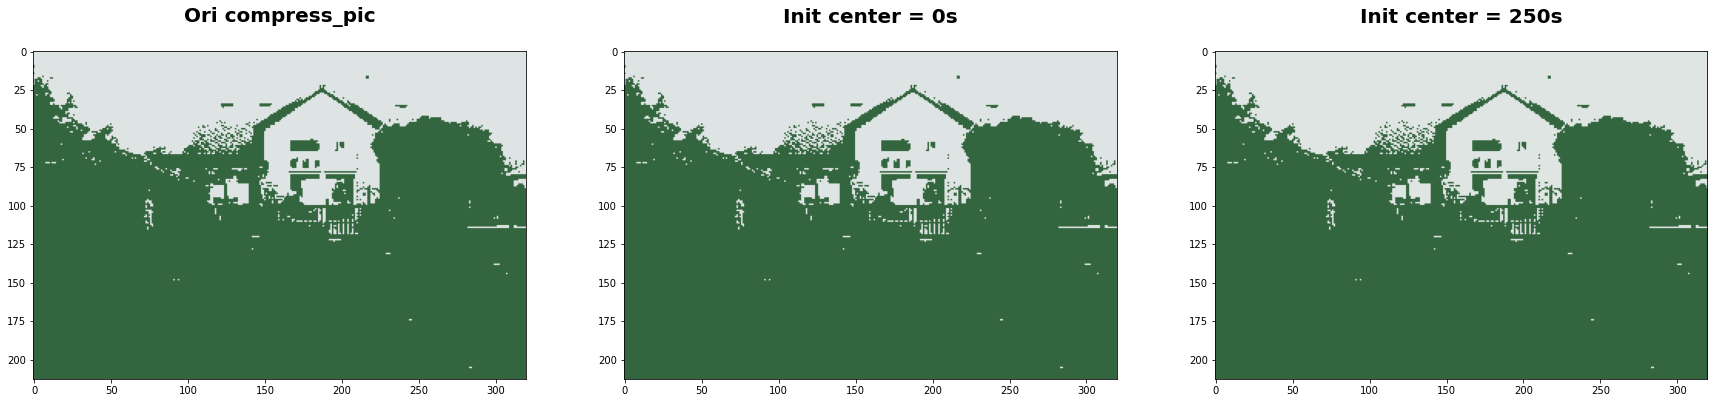

In [14]:
#run the k-means
print("Initialize centriods all at 0:")
start = time.time()
c16_0 = k_means_0(img_array_3r,K2,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K2,int(minutes),round(seconds,3)))

print('=================')

print("Initialize centriods all at 250:")
start = time.time()
c16_1 = k_means_1(img_array_3r,K2,max_iteration= 100,seedNum=123)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Time taken for k_means: k={} is min:{} second:{}".format(K2,int(minutes),round(seconds,3)))

print('=================')
print('Images comparisons with different centroids initialization')
imgage_3_k2_0= comepress_image(c16_0,K2,img_array_3)
imgage_3_k2_1= comepress_image(c16_1,K2,img_array_3)

intro_fig, ax = subplots(1,3, figsize=(30,15))
ax[0].imshow(imgage_3_k2)
ax[0].set_title('Ori compress_pic\n', fontsize=20, weight='bold')
ax[1].imshow(imgage_3_k2_0)
ax[1].set_title('Init center = 0s\n', fontsize=20, weight='bold')
ax[2].imshow(imgage_3_k2_1)
ax[2].set_title('Init center = 250s\n', fontsize=20, weight='bold')

#### Reference:

* Section 9.1 from book 'Pattern Recognition and Machine Learning' by Christopher M.Bishop
* "K-Means Clustering — Introduction to Machine Learning Algorithms" by Rohith Gandhi
* Gatech course "Computing for Data Analsis" - CSE-6040 Module 14